In [3]:
from sq_sql import DBClient
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [49]:
data = pd.read_csv('/Users/jxue/Desktop/jun/wknd_sales/tickets/workbench_output/nine_charts_data_2017_10_22.csv')

In [50]:
data['weekend_date'] = pd.to_datetime(data['weekend_date'])

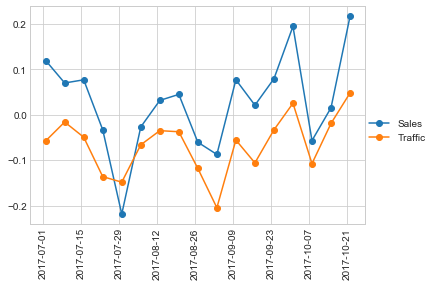

In [24]:
plt.plot(data[data['regioncode'] == 26]['weekend_date'], data[data['regioncode'] == 26]['sales_growth'], marker = 'o', label = 'Sales')
plt.plot(data[data['regioncode'] == 26]['weekend_date'], data[data['regioncode'] == 26]['traffic_growth'], marker = 'o', label = 'Traffic')
plt.legend(prop={'size': 10}, bbox_to_anchor=(1, 0.5), loc='upper left', borderaxespad=0.,)
plt.xticks(rotation=90, size = 10)
plt.show()

In [41]:
from bokeh.io import output_notebook, output_file, show, gridplot
from bokeh.plotting import figure
from bokeh.models import HoverTool, ColumnDataSource, CDSView, BooleanFilter, Legend
import bokeh.plotting as bp
from bokeh.models import PrintfTickFormatter

In [27]:
output_notebook()

Loading BokehJS ...

In [51]:
import datetime
data['formatted_date'] = data['weekend_date']\
.apply(lambda x: datetime.datetime.strftime(x, '%Y-%m-%d'))

In [52]:
data['sales_growth'] = data['sales_growth'] * 100
data['traffic_growth'] = data['traffic_growth'] * 100
data['formatted_sales_growth'] = [str(x) + '%' for x in (data['sales_growth']).round(2)]
data['formatted_traffic_growth'] = [str(x) + '%' for x in (data['traffic_growth']).round(2)]


In [53]:
data.head()

,region_order,regioncode,period,weekend_date,cw_reported_sales,py_actual_sales,sales_growth,cw_traffic,py_traffic,traffic_growth,closing_ratio,py_reported_sales,py_closing_ratio,week_no,formatted_date,formatted_sales_growth,formatted_traffic_growth
0,1,26,201707,2017-07-02,955,853,11.96,2015,2137.777834,-5.743246,0.4739,962,0.45,1,2017-07-02,11.96%,-5.74%
1,2,36,201707,2017-07-02,730,606,20.46,1826,1862.857175,-1.978529,0.3998,652,0.35,1,2017-07-02,20.46%,-1.98%
2,3,34,201707,2017-07-02,2633,2096,25.62,6497,6344.117580,2.409830,0.4053,2157,0.34,1,2017-07-02,25.62%,2.41%
3,4,24,201707,2017-07-02,553,505,9.50,1265,1278.947384,-1.090536,0.4372,486,0.38,1,2017-07-02,9.5%,-1.09%
4,5,32,201707,2017-07-02,1454,1293,12.45,4102,3577.142918,14.672522,0.3545,1252,0.35,1,2017-07-02,12.45%,14.67%


In [56]:
source_24 = ColumnDataSource(data=data[data['regioncode'] == 24])
source_26 = ColumnDataSource(data=data[data['regioncode'] == 26])
source_32 = ColumnDataSource(data=data[data['regioncode'] == 32])
source_34 = ColumnDataSource(data=data[data['regioncode'] == 34])
source_36 = ColumnDataSource(data=data[data['regioncode'] == 36])
source_42 = ColumnDataSource(data=data[data['regioncode'] == 42])
source_44 = ColumnDataSource(data=data[data['regioncode'] == 44])
source_48 = ColumnDataSource(data=data[data['regioncode'] == 48])

hover = HoverTool(tooltips=[
    ("date", "@formatted_date"),
    ("YOY sales growth", "@formatted_sales_growth"),
    ("YOY traffic growth", "@formatted_traffic_growth"),
    
])

p1=bp.figure(plot_width=250,plot_height=250,tools=[hover,'pan,wheel_zoom,box_zoom,reset'],x_axis_type="datetime",title="region 24")
p1.line(x='weekend_date', y='sales_growth', source=source_24, color = 'black', legend = 'sales')
p1.circle(x="weekend_date", y="sales_growth", size=3, color='black', hover_color="red", source=source_24)
p1.line(x='weekend_date', y='traffic_growth', source=source_24, color = 'red', legend = 'traffic')
p1.circle(x="weekend_date", y="traffic_growth", size=3, color='red', hover_color="red", source=source_24)
p1.yaxis[0].formatter = PrintfTickFormatter(format='%0.0f %%')
p1.yaxis.axis_label='YOY'
p1.legend.location = "top_center"

p = gridplot([[p1, None]])

# output_file('daily sales.html')
show(p)

In [28]:
from bokeh.io import gridplot, output_file, show
from bokeh.plotting import figure

# output_file("layout.html")

x = list(range(11))
y0 = x
y1 = [10-i for i in x]
y2 = [abs(i-5) for i in x]

# create a new plot
s1 = figure(width=250, plot_height=250, title=None)
s1.circle(x, y0, size=10, color="navy", alpha=0.5)

# create another one
s2 = figure(width=250, height=250, title=None)
s2.triangle(x, y1, size=10, color="firebrick", alpha=0.5)

# create and another
s3 = figure(width=250, height=250, title=None)
s3.square(x, y2, size=10, color="olive", alpha=0.5)

# put all the plots in a grid layout
p = gridplot([[s1, s2], [None, s3]])

# show the results
show(p)